## Python Exercise : Dummy Variable

## Table of contents

1. Analyze tips data from seaborn
- Total bill and size as numerical independent variable
- Sex, smoker, day and time as categorical independent variable
- Tips as dependent variable
2. Analyze the relationship
3. Apply multiple linear regression with dummy variable
4. Perform simultant test and partial test
5. Check the assumption
6. Interpret the result
7. Use α 5%

## Library

In [25]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset : Tips Dataset

Dataset Description:
Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

In [26]:
tips = sns.load_dataset('tips')

## EDA (Exploratory Data Analysis)

To Understand Our Data:
- descriptive statistics
- correlation
- graphical summary

In [27]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [28]:
tips[['tip','total_bill', 'sex', 'smoker', 'day', 'time', 'size']].describe()

# smoker day time sex time cannot be described due they are all categorical not numerical

,tip,total_bill,size
count,244.000000,244.000000,244.000000
mean,2.998279,19.785943,2.569672
std,1.383638,8.902412,0.951100
min,1.000000,3.070000,1.000000
25%,2.000000,13.347500,2.000000
50%,2.900000,17.795000,2.000000
75%,3.562500,24.127500,3.000000
max,10.000000,50.810000,6.000000


In [29]:
tips[['tip', 'total_bill', 'size']].corr()

,tip,total_bill,size
tip,1.000000,0.675734,0.489299
total_bill,0.675734,1.000000,0.598315
size,0.489299,0.598315,1.000000


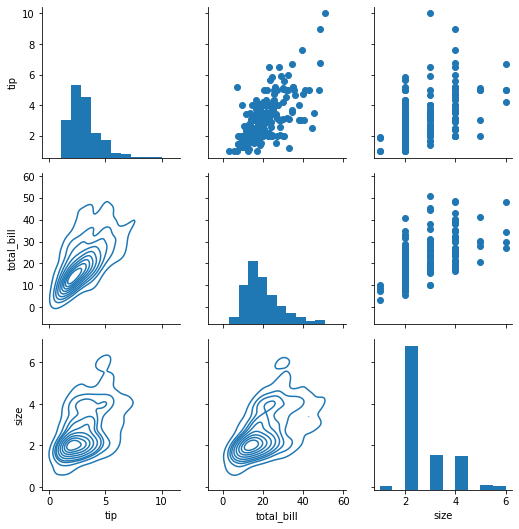

In [30]:
g = sns.PairGrid(tips[['tip', 'total_bill', 'size']])
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## Dummy variable preprocessing

We need to do dummy variabel preprocessing for the categorical variable such as sex, smoker, day and time.

In [31]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [32]:
tips_dummy = pd.get_dummies(tips, drop_first = True, columns = ['sex', 'smoker', 'day', 'time'])

In [33]:
tips_dummy

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


In [34]:
tips_dummy.columns

Index(['total_bill', 'tip', 'size', 'sex_Female', 'smoker_No', 'day_Fri',
       'day_Sat', 'day_Sun', 'time_Dinner'],
      dtype='object')

## Linear Regression with dummy variable

We start to fit the linear regression Model:
- Y : Tip
- X : Total Bill, size, sex_Female, smoker_No, day_Fri, day_Sat, day_Sun, time_Dinner

In [36]:
fitur = ['total_bill', 'size', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Dinner']
target = 'tip'

In [39]:
sm_lm = sm.OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur]))
result = sm_lm.fit()

In [40]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.20e-28
Time:                        21:05:08   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

## Assumption

we will asses some assumption and check the multicollinearity
1. Normality
1. Gauss-Markov
1. Multicollinearity

## 1. Normality

C:\Users\amarz\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

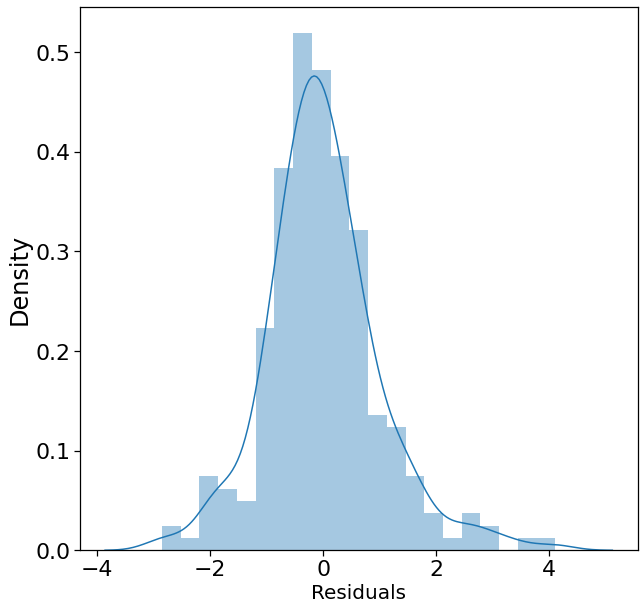

In [45]:
plt.figure(figsize =(10,10))
sns.set_context('notebook', font_scale =2)
sns.distplot(result.resid)
plt.xlabel('Residuals', fontsize = 20)

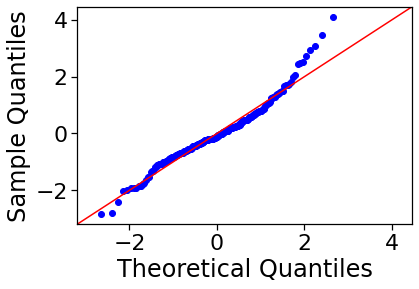

In [47]:
sm.qqplot(result.resid, line = '45')
plt.show()

# 2. Gauss Markov

C:\Users\amarz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\amarz\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

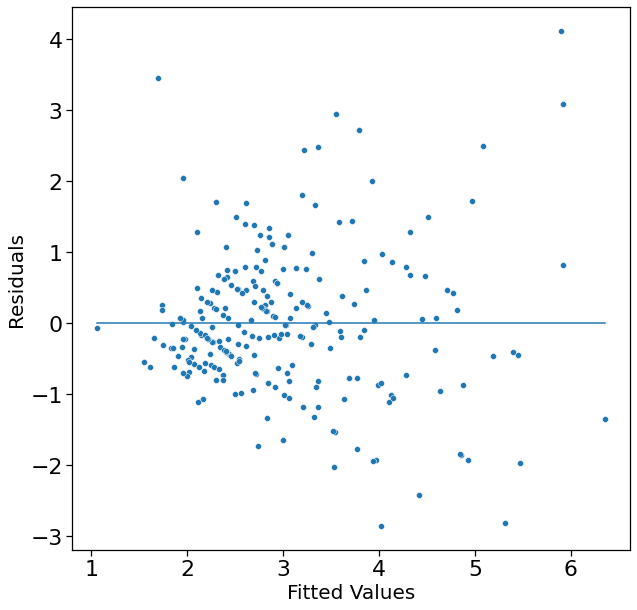

In [52]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(result.fittedvalues, result.resid)
sns.lineplot(result.fittedvalues, 0)
plt.xlabel('Fitted Values', fontsize = 20)
plt.ylabel('Residuals', fontsize = 20)

## Multicollinearity

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [56]:
calc_vif(tips_dummy[fitur])

,variables,VIF
0,total_bill,9.443197
1,size,12.048233
2,sex_Female,1.479481
3,smoker_No,2.635550
4,day_Fri,2.559699
5,day_Sat,17.730443
6,day_Sun,15.810322
7,time_Dinner,33.150259


Assumption Assesment:
1. If we refer to the histogram, the residual seemed normally distributed
1. Model residuals gather around zero
1. No certain pattern in the residual plot
1. Heteroscedasticity Occur
1. vif is not acceptable : this is make sense because there should be relationship between size and total bill. So, actually we only need either total bill or size. time dinner has the highest value of vif, it's reasonable if we exclude time dinner from model.

## Model Improvements

We need to improve the model because multicollinearity problem. We refit the linear regression Model with following features:
- Y : Tips
- X : Total Bill, sex_Female, smoker_No, day_Fri, day_Sat, day_Sun

In [57]:
fitur = ['total_bill', 'sex_Female', 'smoker_No', 'day_Fri', 'day_Sat', 'day_Sun']
target = 'tip' 
sm_lm = sm.OLS(tips_dummy[target], sm.add_constant(tips_dummy[fitur]))
result = sm_lm.fit()

In [58]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     33.81
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           2.35e-29
Time:                        21:30:45   Log-Likelihood:                -349.51
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     237   BIC:                             737.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7819      0.238      3.285      0.0

In [59]:
calc_vif(tips_dummy[fitur])

,variables,VIF
0,total_bill,3.670370
1,sex_Female,1.439580
2,smoker_No,2.228945
3,day_Fri,1.175956
4,day_Sat,1.985433
5,day_Sun,2.068751


No problem in multicollinearity Anymore